<div class="fluid-row" id="section-header">
    <h2 class="title toc-ignore">Master Data Science & Big Data - Rutgers</h2>
    <h4 class="author"><em>DataMavericks</em></h4>
    <h4 class="date"><em>October 20, 2018</em></h4>
</div>
<center>
    <h1>
        <u>Cars Price Predictor</u>
    </h1>
    <h4>Realized by : The Data Mavericks <br></h4>
</center>
<div class="fluid-row" id="section-header">
    <h2 class="title toc-ignore">Introduction</h2>
    <p class="lead">In this notebook we will build a multiple regression model that can predict cars price based on multiple features such as mileage, make, and year. The data we will work with was extracted from a famous data science platform called <a href="https://www.kaggle.com/jpayne/852k-used-car-listings">Kaggle</a>. The notebook will be presented as follow : 
    </p>
    <ul class="lead">
        <li>Data collection</li>
        <li>Data Preprocessing & Cleansing</li>
        <li>Exploratory data analysis & Visualisation</li>
        <li>Data Modeling</li>
        <li>Evaluting the Model</li>
    </ul>
</div>

## Data collection

In [1]:
# data colelction and preprocessing
from bs4 import BeautifulSoup
import requests
import pandas as pd
import csv
# for data visualisation and statistical analysis
import numpy as np
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set_style("white")
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline

## Data Preprocessing & Cleansing

<p class="lead">We took the RAW data from Kaggle, and preprocessed these dataset in order ta make it useful for visualization and training session.</p>
<p class="lead">We need to load data into a data frame, so that we can manipulate it easily ...</p>

In [3]:
# set the column names
# Price	Year	Mileage	City	State	Vin	Make	Model

colnames=['Price','Mileage','City','State','Vin','Make','Model'] 
# read the csv file as a dataframe
df = pd.read_csv("./datamaverick/Data/true_car_listings.csv", sep=",",header='infer',low_memory=False)
# let's get some simple vision on our dataset
df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


In [5]:
len(df)

852122

### Starting the Preprocessing

<p class="lead">The first thing I have to do is to clean unwanted strings from my columns, then change it to the appropriate type since all of them are string values and finally drop unwanted columns such as VIN.</p>

#### Price Columns

<p class="lead">One thing we have noticed is that there are some listing that were published without the price, so the first thing to do is to delete those rows.</p>

In [8]:
# change it to integer value
df.Price = pd.to_numeric(df.Price, errors = 'coerce', downcast= 'integer')

#### NJ Cars Only

In [9]:
df = df[df.State.str.contains("NJ") == True]

#### Year Model

In [10]:
df.Year = pd.to_numeric(df.Year, errors = 'coerce', downcast = 'integer')

#### Mileage

#### Make  `mileage` numeric 

In [11]:
df.Mileage = pd.to_numeric(df.Mileage, errors = 'coerce', downcast = 'integer')

#### Make

In [12]:
# remove spaces from the Make
df.Make = df.Make.map(lambda x: x.strip())

#### Model

In [13]:
# remove spaces fro Model
df.Model = df.Model.map(lambda x: x.strip())

#### Drop unwanted columns

<p class="lead">The `VIN` in this model is not needed so we will delete them defintely, since they are not very representative in this case, for the model categorical feature we will drop it because of the hugeamount of levels.</p>

In [14]:
df = df.drop(columns=['Vin'])

## Exploratory data analysis & Visualisation

### price distribution by `Year`

<p class="lead">Let's visualize the distribution of cars price by their year model release, and look how it behaves</p>

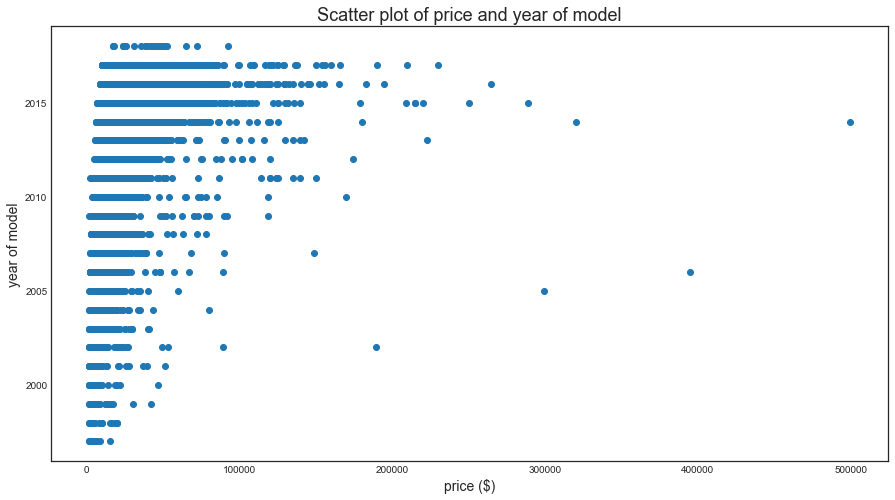

In [15]:
# here we set the figure size to 15x8
plt.figure(figsize=(15, 8))
# plot two values price per year_model
plt.scatter(df.Price, df.Year)
plt.xlabel("price ($)", fontsize=14)
plt.ylabel("year of model", fontsize=14)
plt.title("Scatter plot of price and year of model",fontsize=18)
plt.show()

<p class="lead">As we can see from the plot above, the cars price increase respectivly by years, and more explicitly we can say that the more the car is recently released, the price augment, while in the other side the oldest cars still have a low price, and this is totally logical since whenever the cars become kind of old from the date of release, so their price start decrease.</p>

### Price distribution by mark

<p class="lead">Since we're looking to express the cars price by different features, so one of the important plot is to visualize how these prices differs between cars marks.</p> 

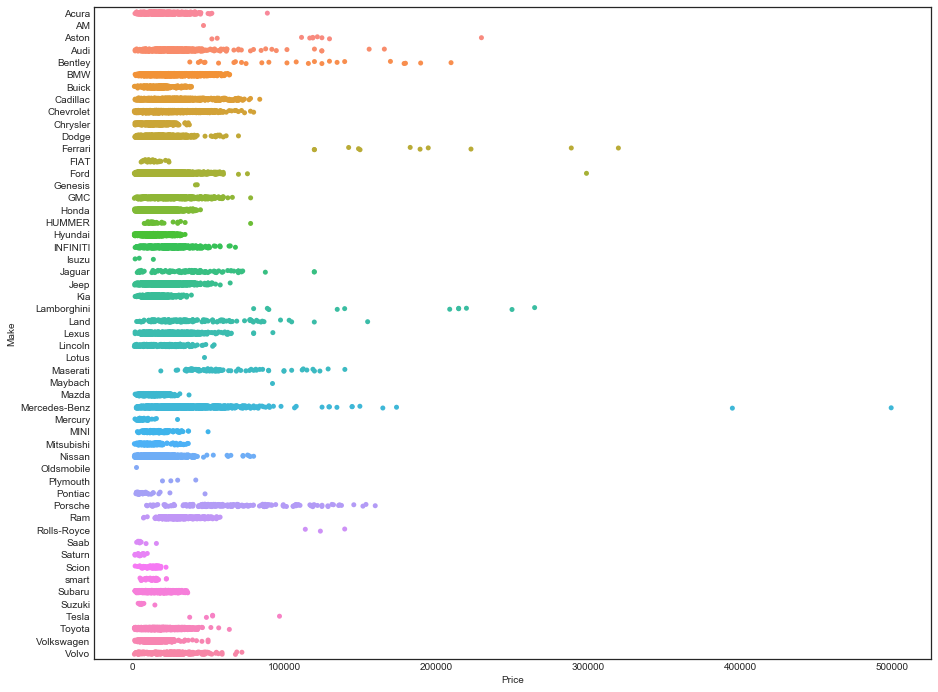

In [16]:
f, ax = plt.subplots(figsize=(15, 12))
sns.stripplot(data = df, x='Price', y='Make', jitter=.1)
plt.show()

### Interpretation

<p class="lead">From the plot above, we can extract some the following insights : </p>
<ul class="lead" style="list-style: square;">
    <li>The popular makes such as Honda, Ford, Nissan and Toyota had a stable range of price, in other words they are not well diversified on the price axis.</li>
    <li>In the opposit side, we can clearly notice that the sophisticated cars are well distributed over the price axis such as the Mercedes-Benz, Lamborgini, Ferrari, Maserati, Bentley ..., which means that the more the cars from those classes, the more their price augments</li>
</ul>

### Top 20 Mark Distribution

<p class="lead">For the mark feature I have 53 marks, so plotting it all is not a good option for visual purpose, I will plot only the top 20 mark</p>

In [17]:
print('The length of unique marks feature is',len(df.Make.unique()))

The length of unique marks feature is 53


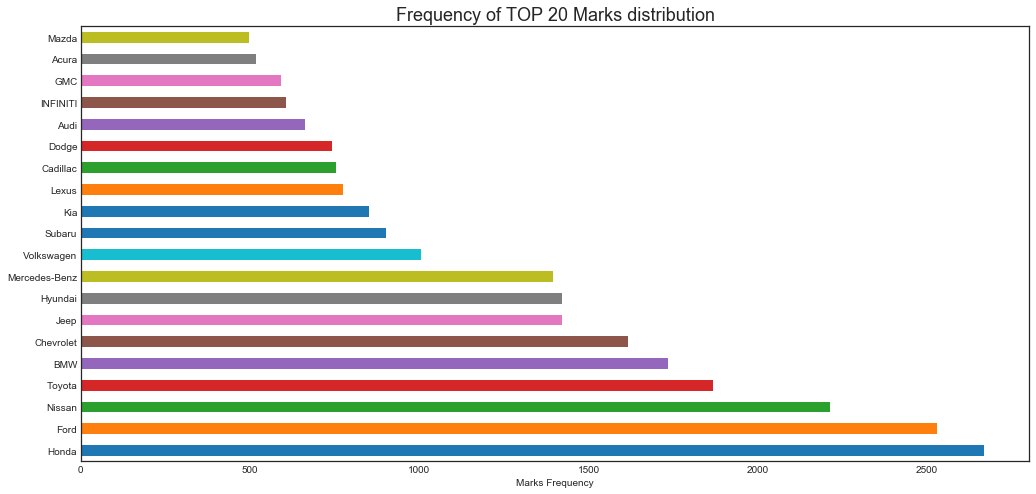

In [18]:
plt.figure(figsize=(17,8))
df.Make.value_counts().nlargest(20).plot(kind='barh')
plt.xlabel('Marks Frequency')
plt.title("Frequency of TOP 20 Marks distribution",fontsize=18)
plt.show()

### Price Distribution by Make

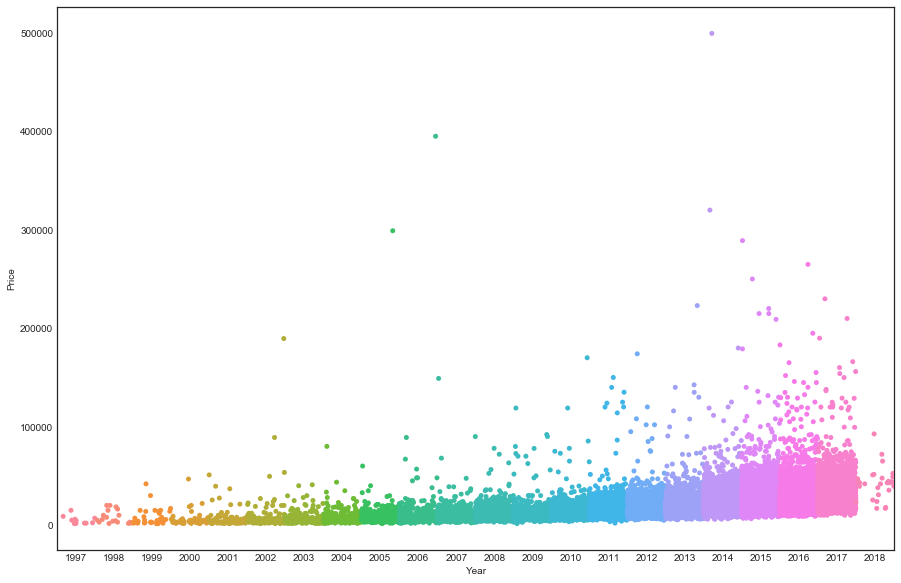

In [19]:
f, ax = plt.subplots(figsize=(15, 10))
sns.stripplot(data = df, x='Year', y='Price', jitter=.5)
plt.show()

#### Some Insights with Violin plot

<p class="lead">This chart is a combination of a Box Plot and a Density Plot that is rotated and placed on each side, to show the distribution shape of the data.</p>

In [20]:
MostPopular = df.groupby(['Make']).size()
# MostPopular.sort_values(by='count', ascending=False)
MostPopular.sort_values(ascending=False).head(5)

Make
Honda     2669
Ford      2530
Nissan    2214
Toyota    1869
BMW       1736
dtype: int64

In [21]:
Makes = ['Honda', 'Ford', 'Nissan', 'Toyota', 'BMW']

Top5MostPopular = df[df.Make.isin(Makes)]
Top5MostPopular

,Price,Year,Mileage,City,State,Make,Model
24265,9498,2004,25187,Mount Laurel,NJ,BMW,3
24290,5499,2004,67719,Lakewood,NJ,BMW,3
24301,9395,2010,74648,Lodi,NJ,BMW,3
24337,8400,2006,56495,Hasbrouck Heights,NJ,BMW,3
24348,9299,2009,72367,Jersey City,NJ,BMW,3
24352,12999,2010,36689,Lodi,NJ,BMW,3
24365,10900,2011,72106,Ramsey,NJ,BMW,3
24374,6255,2008,107110,Watchung,NJ,BMW,3
24380,9750,2007,59100,Springfield,NJ,BMW,3
24381,7900,2005,58209,Paterson,NJ,BMW,3


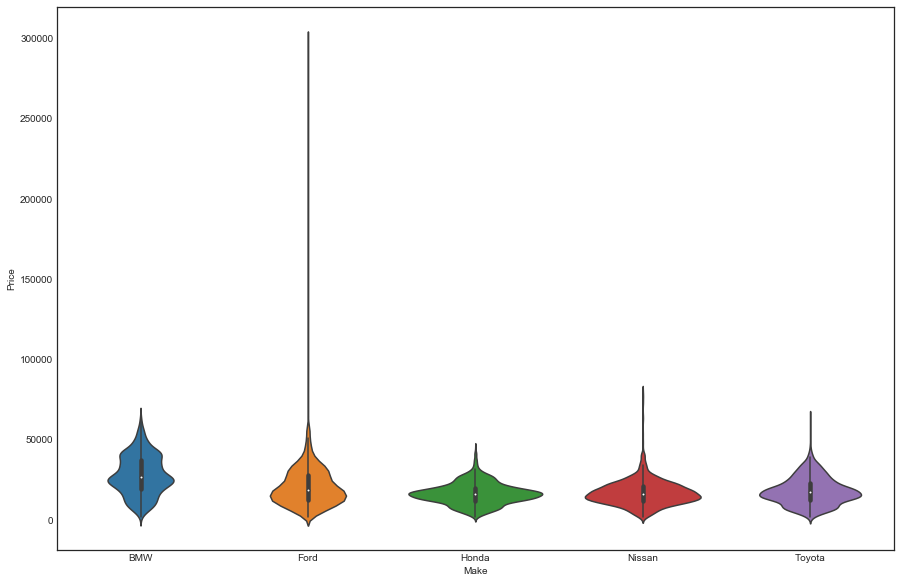

In [22]:


f, ax = plt.subplots(figsize=(15, 10))

sns.violinplot(data = Top5MostPopular, x='Make', y='Price')
plt.show()

<p class="lead">From the plot above, we can clearly visualise a lot of information such as the minimum, maximum price for 'most popular' cars and also get perception on the Median values, but more particularly what we got in violin plot other than the box plot, is the density plot width known as Kernel Density Plots.</p> The Japenese cars have a less range/spread. Whereas, BMW has largest range.

#### Price distribution by mileage and fuel type

<p class="lead">In the following plot we will visualize the price distribution by the mileage values groupping by the fuel type and draw the best fit line that express the price (target feature) by mileage.</p> 

# Work in Progress

In [23]:
# # define a color dictionarry by fuel_type
# color_dict = {'Diesel': 'blue', 'Essence': 'orange', 'Electrique': 'yellow', 'LPG': 'magenta'}

# # set the figure size and plot the price & mileage points with the fit line in red
# fig, ax = plt.subplots(figsize = (15,10))
# plt.plot(np.unique(df.year_model), np.poly1d(np.polyfit(df.year_model, df.price, 1))(np.unique(df.year_model)), c = 'red', linewidth = 1)
# plt.scatter(df.year_model, df.price, c = [color_dict[i] for i in df.fuel_type], marker='+')
# # get the list of unique fuel type
# fuel_type = df.fuel_type.unique()
# recs = []
# for i in fuel_type:
#     recs.append(mpatches.Rectangle((2,2),1,1,fc=color_dict[i]))
#     plt.legend(recs,fuel_type,loc=1, fontsize = 16)

# plt.title('Price of cars by year model groupped by fuel type', 
#           fontsize = 20)
# plt.ylabel('Price', fontsize = 16)
# plt.xlabel('year model', fontsize = 16)

# xvals = ax.get_xticks()
# ax.set_xticklabels(['{}'.format(int(x)) for x in xvals])

# yvals = ax.get_yticks()
# ax.set_yticklabels(['{}'.format(int(y)) for y in yvals])

# plt.show()

<p class="lead">Although weak, it appears that there seems to be a positive relationship. Let's see what is the actual correlation between price and the other data points. We will look at this in 2 ways heatman for visualization and the correlation coefficient score.</p>

### Correlation matrix

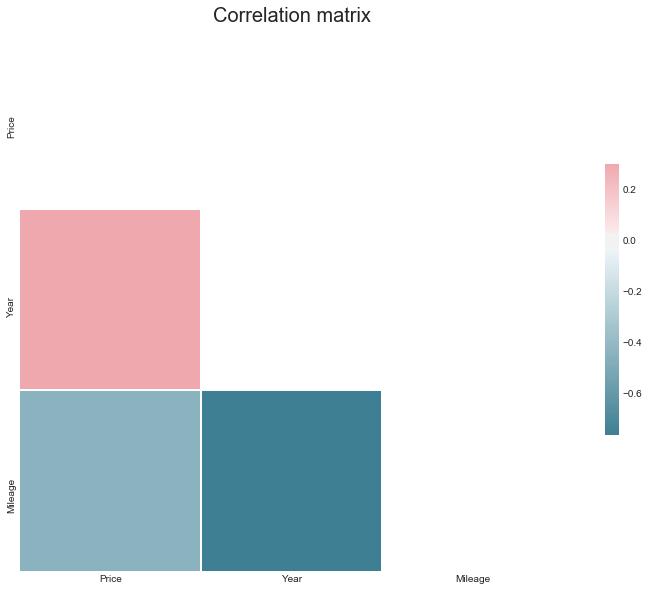

In [24]:
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))
# Compute the correlation matrix
corr = df.corr()
#print(corr)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation matrix', 
          fontsize = 20)
plt.show()

#### Distribution by city

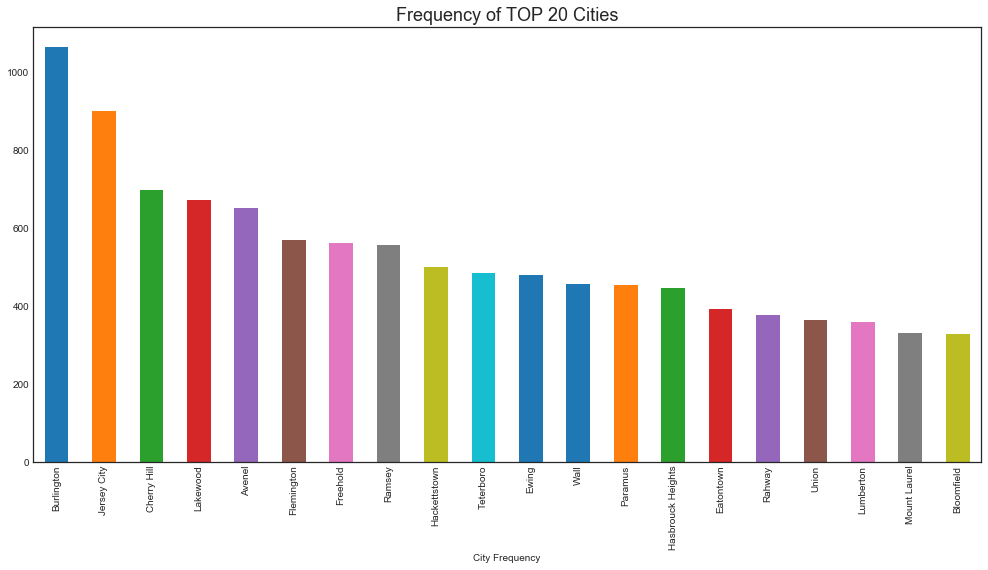

In [25]:
plt.figure(figsize=(17,8))
df.City.value_counts().nlargest(20).plot(kind='bar')
plt.xlabel('City Frequency')
plt.title("Frequency of TOP 20 Cities",fontsize=18)
plt.show()

<p class="lead">We can clearly visualize that most of ad publications are coming from Burlington & Jersey City, which is quite normal due to the geographic distribution of the population in those cities, furthermore the economic position of those cities beyond the other ones</p>

# Data Modeling 

## KNN Regression

<p class="lead">For the moment we will use the K nearset neighbors regressor model with only numerical features, to get a basic view on our model how it behaves, then we will add other categorical features to improve it later.</p>

In [145]:
## create a dataframefor testing
data = df[df.Price < 20000]

In [146]:
data.head()

,Price,Year,Mileage,City,State,Make,Model
15,14995,2014,23454,Hackettstown,NJ,Acura,ILX5-Speed
19,7990,2007,60552,Fairlawn,NJ,Acura,TSX4dr
25,15995,2014,37483,Egg Harbor,NJ,Acura,TSXSpecial
46,8995,2007,53525,South Hackensack,NJ,Acura,TSX4dr
85,11982,2013,69027,Lakewood,NJ,Acura,ILX5-Speed


In [147]:
print(len(data))
print(len(df))

15685
27852


### Dealing with Categorical Features

<p class="lead">At the moment we still have 3 categorical features which are the year, mark and model the aim of this section is to pre process those features in order to make them numerical so that they will fit into our model.<br/>
However, we will try to add to fuel_type. 
 
In litterature there is two famous kind of categorical variable transformation, the first one is <b>label encoding</b>, and the second one is the <b>one hot encoding</b>, for this use case we will use the one hot position  and the reason why I will choose this kind of data labeling is because I will not need any kind of data normalisation later, and also This has the benefit of not weighting a value improperly but does have the downside of adding more columns to the data set. </p>

In [148]:
X = data[['Year', 'Mileage', 'Make']]
Y = data.Price
X = pd.get_dummies(data=X)

In [149]:
X.head()

,Year,Mileage,Make_Acura,Make_Audi,Make_BMW,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Chrysler,Make_Dodge,...,Make_Ram,Make_Saab,Make_Saturn,Make_Scion,Make_Subaru,Make_Suzuki,Make_Toyota,Make_Volkswagen,Make_Volvo,Make_smart
15,2014,23454,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,2007,60552,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,2014,37483,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,2007,53525,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
85,2013,69027,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Data Splitting 

<p class="lead">Usually we split our data into three parts : Training , validation and Testing set, but for simplicity we will use only train and test with 20% in test size.</p>

In [150]:
# now we use the train_test_split function already available in sklearn library to split our data set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 42)

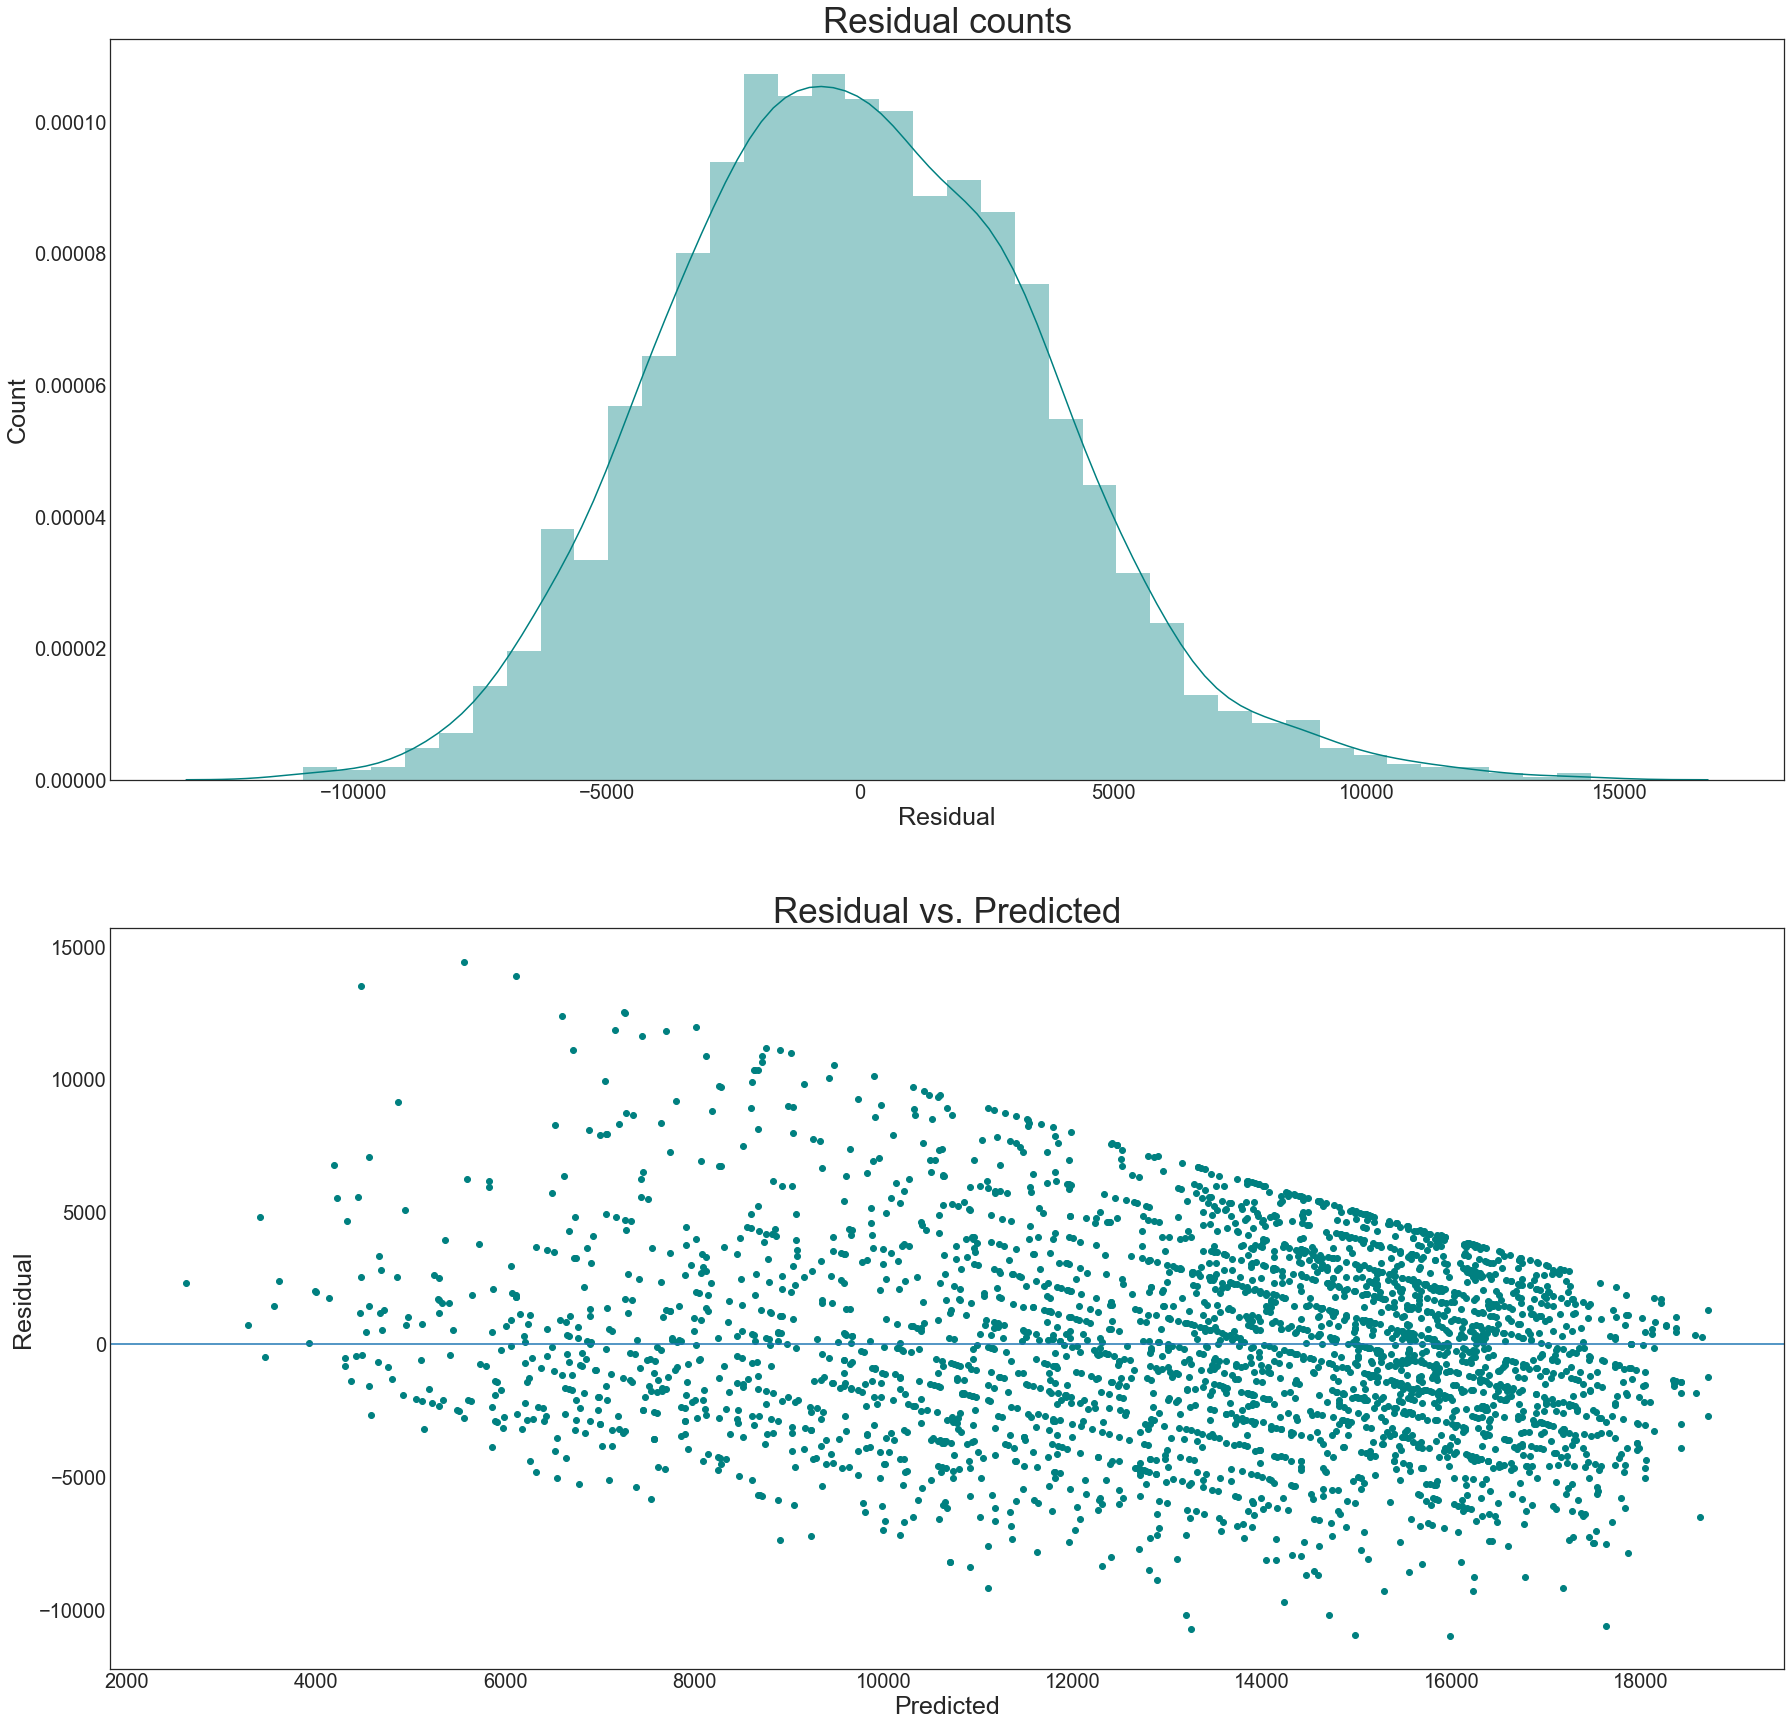

RMSE:
3648.085310020515


In [151]:
from sklearn import neighbors
# the value of n_neighbors will be changed when we plot the histogram showing the lowest RMSE value
knn = neighbors.KNeighborsRegressor(n_neighbors=6)
knn.fit(X_train, Y_train)

predicted = knn.predict(X_test)
residual = Y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test, predicted))
print('RMSE:')
print(rmse)

In [152]:
from sklearn.metrics import r2_score
print('Variance score: %.2f' % r2_score(Y_test, predicted))

Variance score: 0.34


<p class="lead">as we can see we got 34% in the r^2 score by using n_neighbors = 6, we still don't know if it's the optimal number of neighors or not, so for that we will plot a histogram of different Root Mean Squared Error by n_neighbors and see who's have the lowest RMSE value, and another thing is that the mean of cross validation values is very low which may indicate that our model had overfitted.</p>

In [153]:
rmse_l = []
num = []
for n in range(2, 16):
    knn = neighbors.KNeighborsRegressor(n_neighbors=n)
    knn.fit(X_train, Y_train)
    predicted = knn.predict(X_test)
    rmse_l.append(np.sqrt(mean_squared_error(Y_test, predicted)))
    num.append(n)

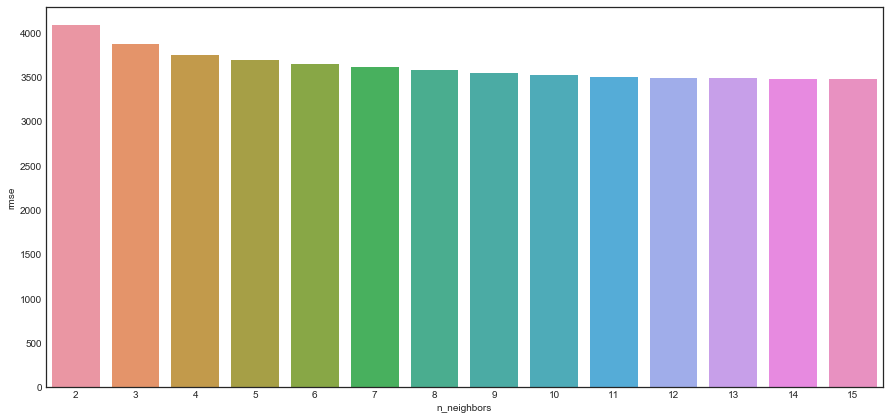

In [154]:
df_plt = pd.DataFrame()
df_plt['rmse'] = rmse_l
df_plt['n_neighbors'] = num
ax = plt.figure(figsize=(15,7))
sns.barplot(data = df_plt, x = 'n_neighbors', y = 'rmse')
plt.show()

<p class="lead">It appears that 6 nearest neighbors is the optimal number of neighbors.</p>

## Descision Tree Regression

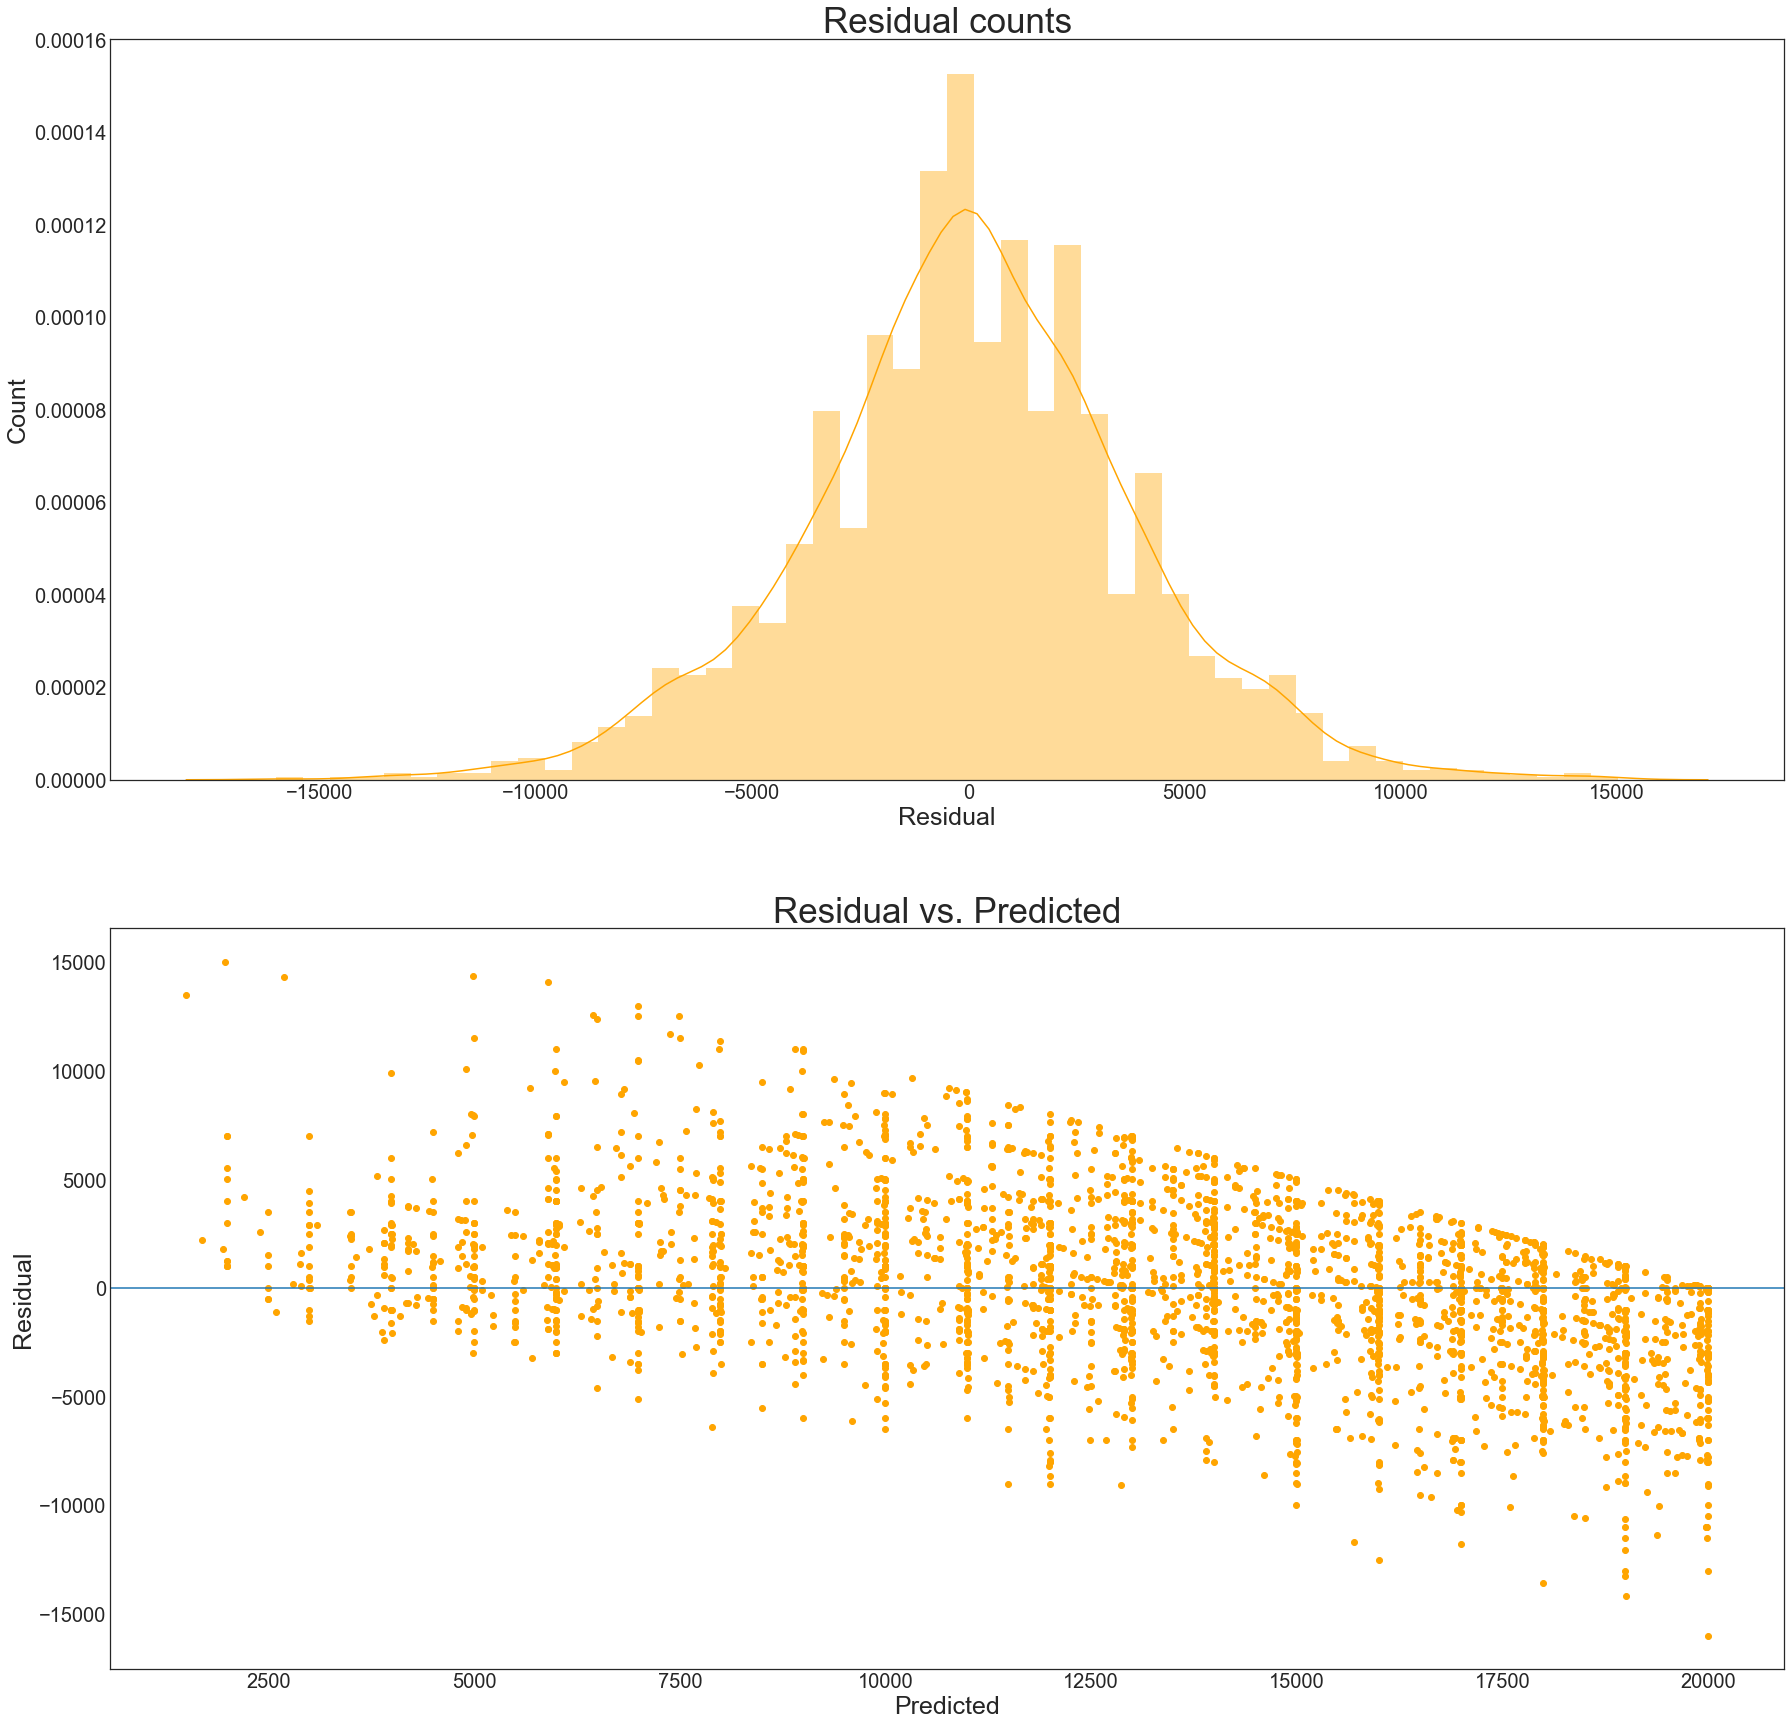

RMSE:
3808.5917126580885


In [155]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_features='auto')
dtr.fit(X_train, Y_train)
predicted = dtr.predict(X_test)
residual = Y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='orange')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='orange')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test, predicted))
print('RMSE:')
print(rmse)

In [156]:
print('Variance score: %.2f' % r2_score(Y_test, predicted))

Variance score: 0.28


<p class="lead">The root-mean-square deviation (RMSD) or root-mean-square error (RMSE) (or sometimes root-mean-squared error) is a frequently used measure of the differences between values (sample and population values) predicted by a model or an estimator and the values actually observed. The RMSD represents the sample standard deviation of the differences between predicted values and observed values. These individual differences are called residuals when the calculations are performed over the data sample that was used for estimation, and are called prediction errors when computed out-of-sample. The RMSD serves to aggregate the magnitudes of the errors in predictions for various times into a single measure of predictive power. RMSD is a measure of accuracy, to compare forecasting errors of different models for a particular data and not between datasets, as it is scale-dependent. ~ WikiPedia<br>
By comparing the Tree Regression with the KNN Regression we can see that the RMSE was reduced from 37709 to 34392 which let us say that this model is more accurate than the last one, but that's not all of it, we still have to test other regression algorithm to check if there is any improvement in result.
</p>

## Interpretation

<p class="lead">By looking at the last RMSE score we've vast improvements, as you can see from the "Residual vs. Predicted" that the predicted score is closer to zero and is tighter around the lines which means that we are guessing alot closer to the price.</p>

# What about Simple Linear Regression

## Linear Regression 

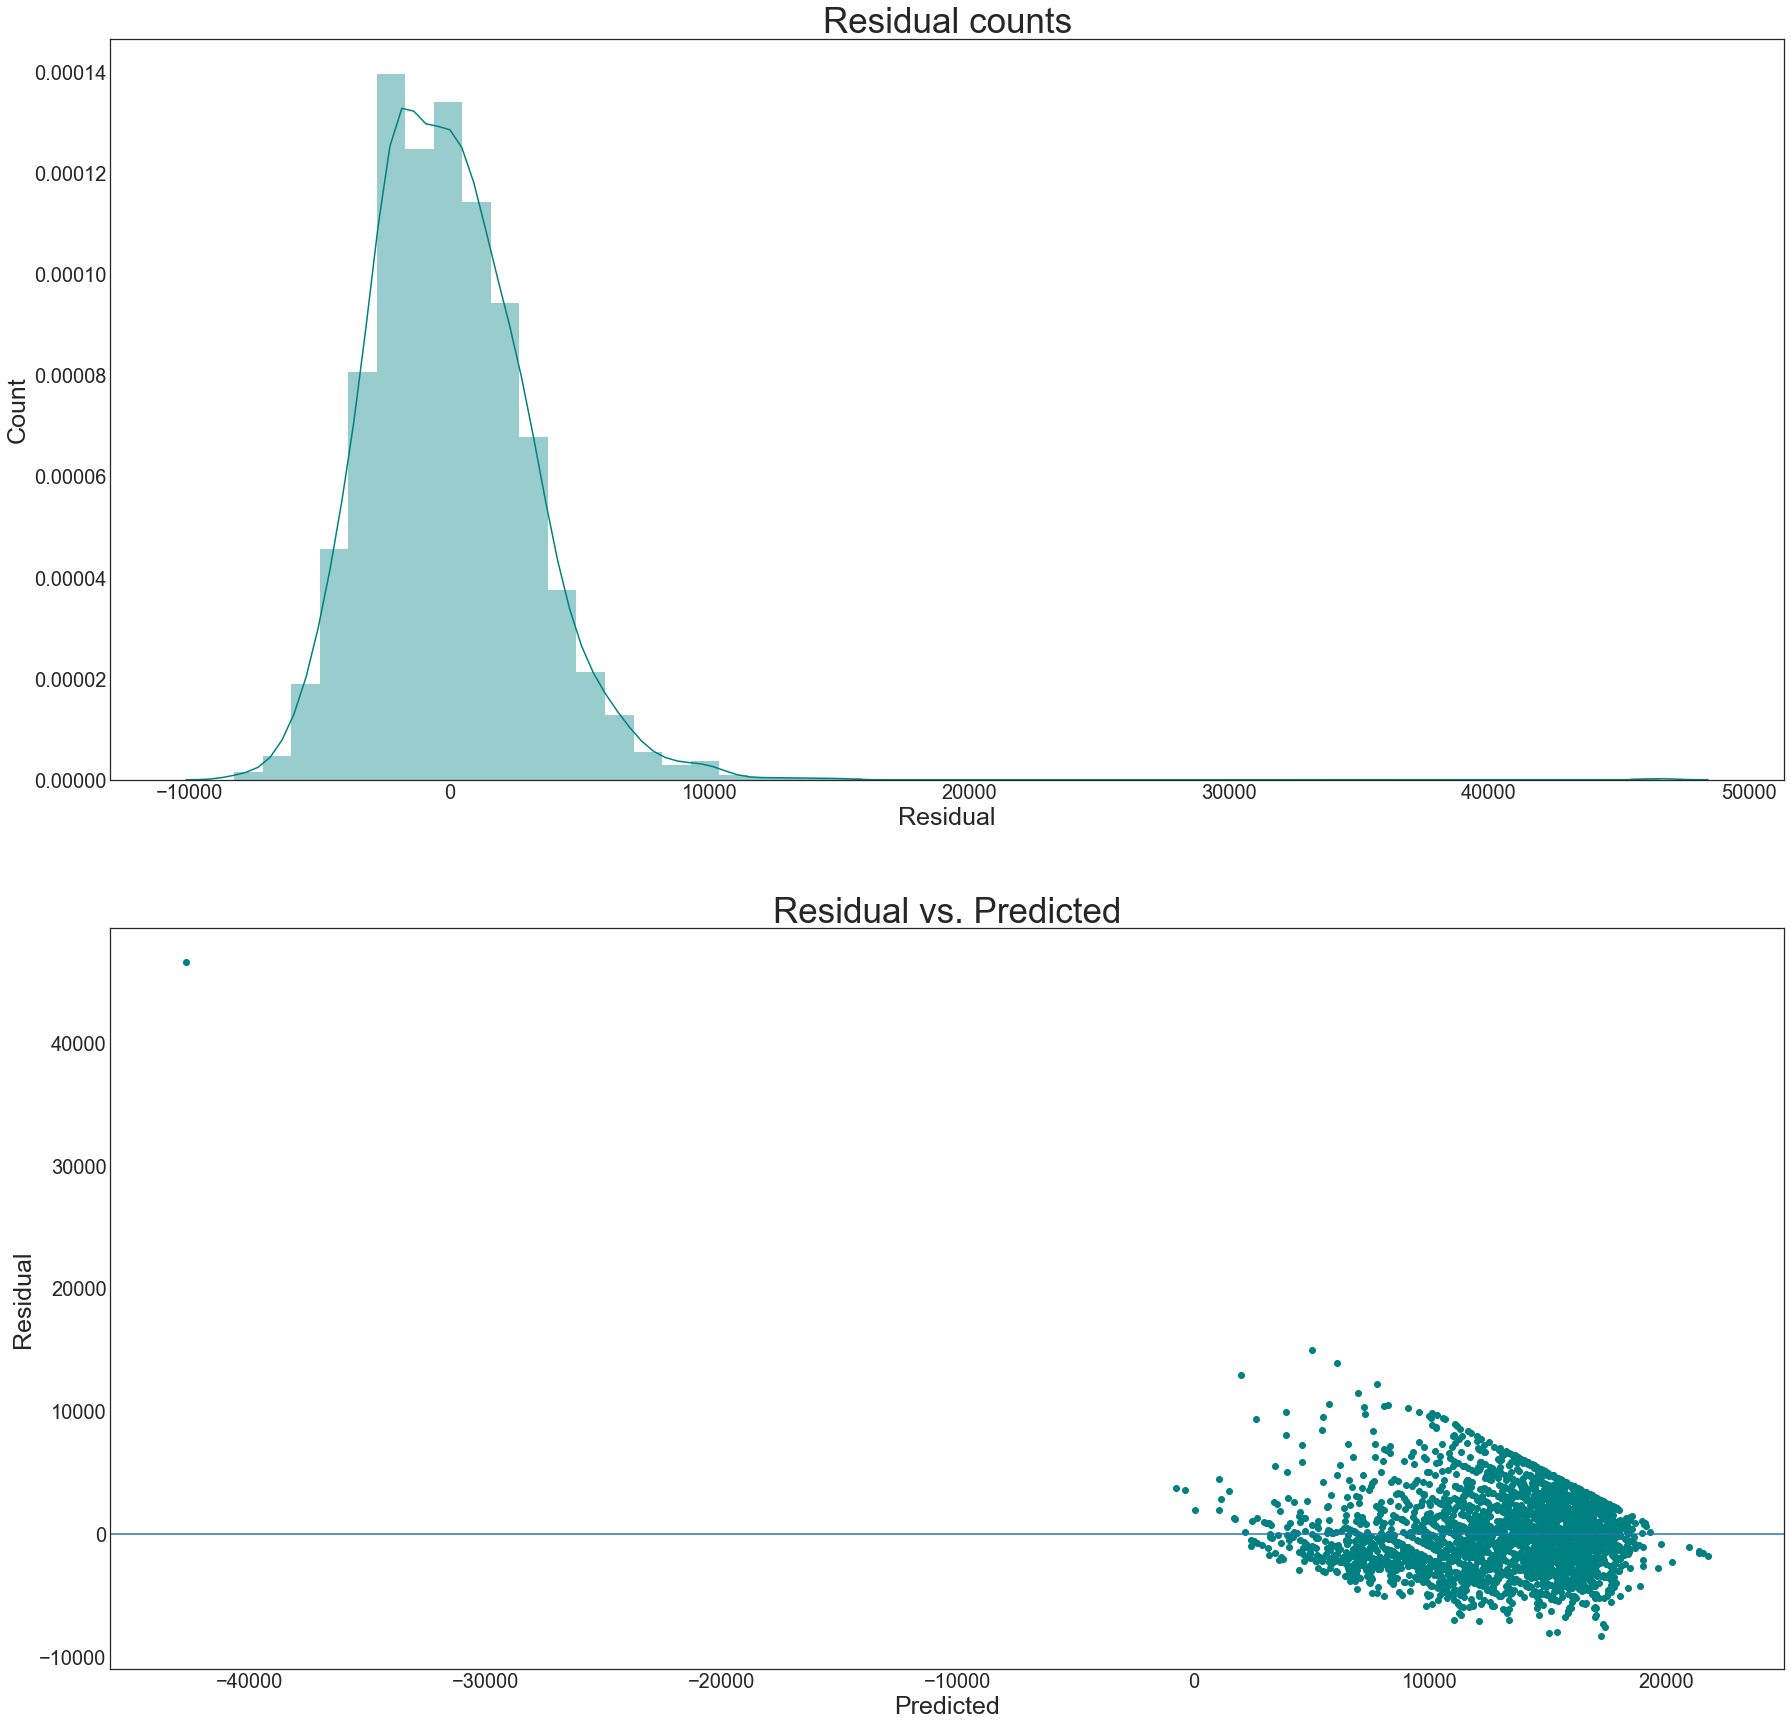

RMSE:
3053.740438504938


In [157]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

predicted = regr.predict(X_test)
residual = Y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test, predicted))
print('RMSE:')
print(rmse)

In [158]:
print('Variance score: %.2f' % r2_score(Y_test, predicted))

Variance score: 0.54


## Boosting

<p class="lead">Boosting is a machine learning ensemble meta-algorithm for primarily reducing bias, and also variance in supervised learning, and a family of machine learning algorithms which convert weak learners to strong ones. Boosting is based on the question posed by Kearns and Valiant (1988, 1989): Can a set of weak learners create a single strong learner? A weak learner is defined to be a classifier which is only slightly correlated with the true classification (it can label examples better than random guessing). In contrast, a strong learner is a classifier that is arbitrarily well-correlated with the true classification. ~ WikiPedia)
<br>Let's see if boosting can improve our scores.</p>

In [159]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

r_sq = []
deep = []
mean_scores = []

#loss : {‘ls’, ‘lad’, ‘huber’, ‘quantile’}
for n in range(3, 11):
    gbr = GradientBoostingRegressor(loss ='ls', max_depth=n)
    gbr.fit (X, Y)
    deep.append(n)
    r_sq.append(gbr.score(X, Y))
    mean_scores.append(cross_val_score(gbr, X, Y, cv=6).mean())

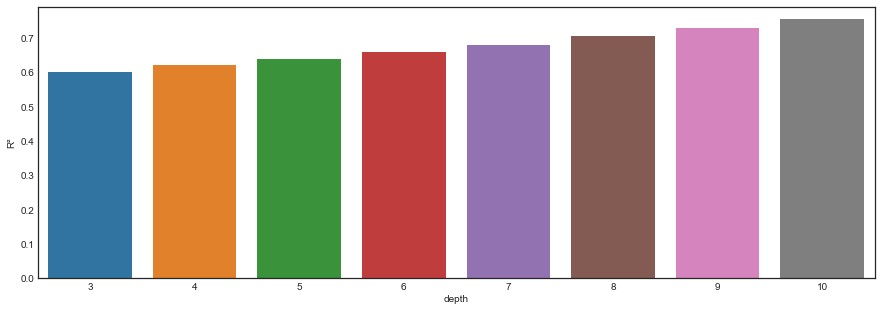

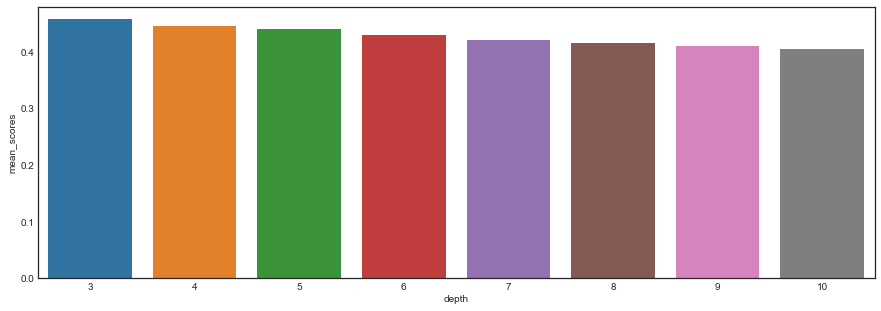

In [160]:
plt_gbr = pd.DataFrame()

plt_gbr['mean_scores'] = mean_scores
plt_gbr['depth'] = deep
plt_gbr['R²'] = r_sq

f, ax = plt.subplots(figsize=(15, 5))
sns.barplot(data = plt_gbr, x='depth', y='R²')
plt.show()

f, ax = plt.subplots(figsize=(15, 5))
sns.barplot(data = plt_gbr, x='depth', y='mean_scores')
plt.show()

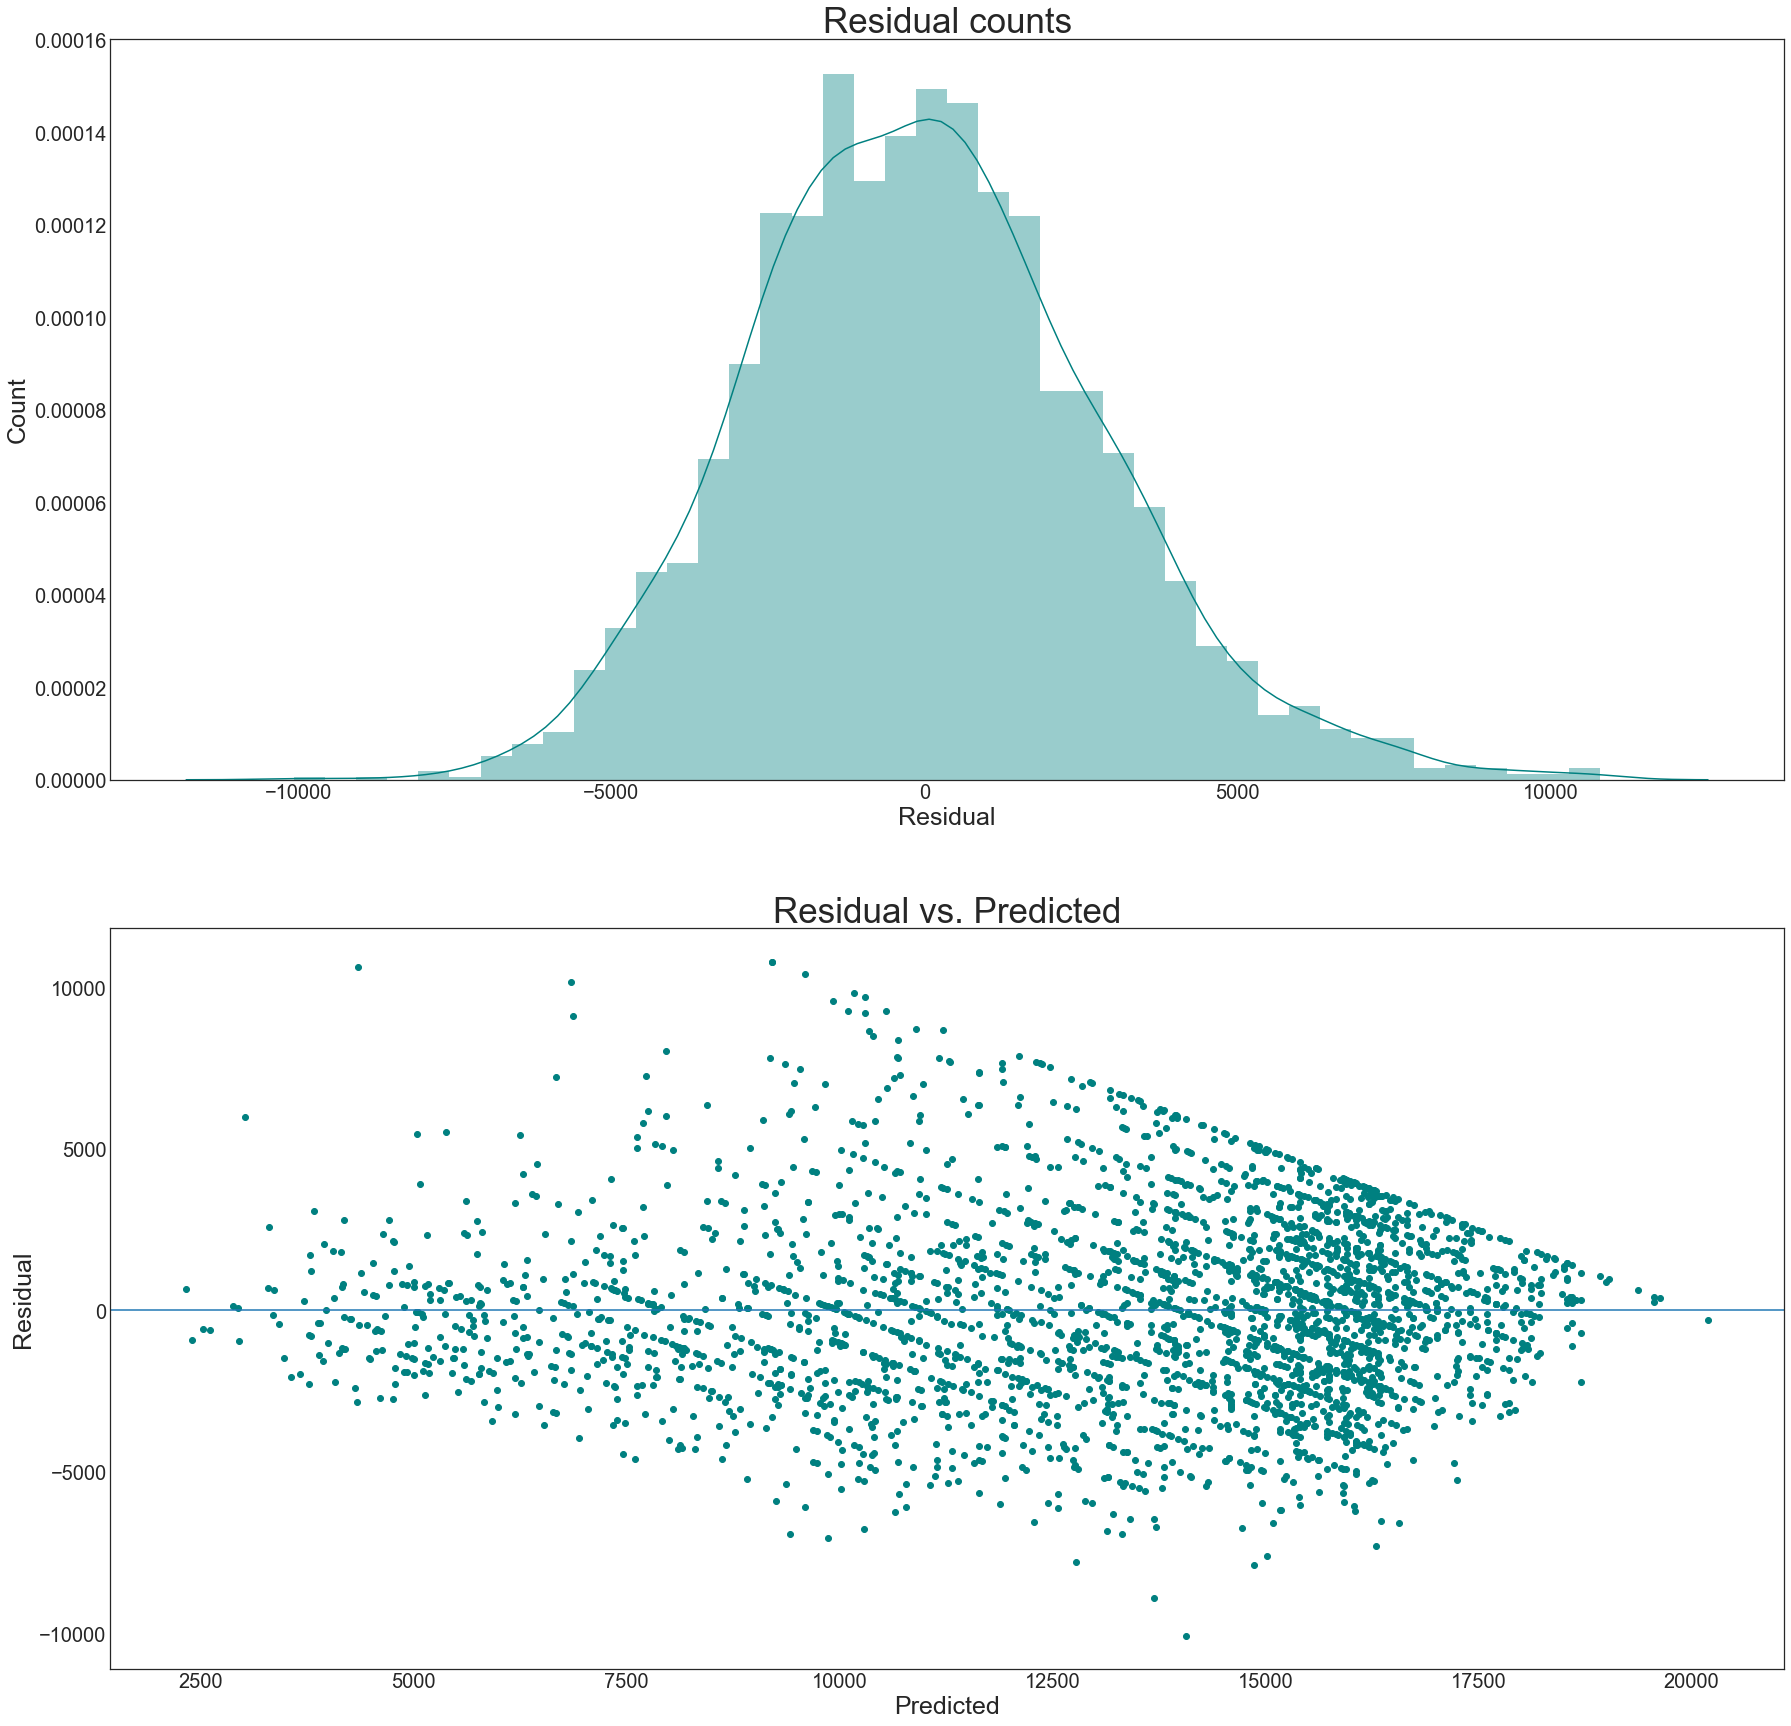


Cross Validation Scores:
[ 0.48921552  0.36880021  0.20129189 -0.27882431  0.69273378  0.36900341
  0.40296932  0.38619572  0.32541589  0.44884572  0.47595809  0.36434648]

Mean Score:
0.3538293111316633

RMSE:
2788.4512507269874


In [161]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

gbr = GradientBoostingRegressor(loss ='ls', max_depth=6)
gbr.fit (X_train, Y_train)
predicted = gbr.predict(X_test)
residual = Y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

rmse = np.sqrt(mean_squared_error(Y_test, predicted))
scores = cross_val_score(gbr, X, Y, cv=12)

print('\nCross Validation Scores:')
print(scores)
print('\nMean Score:')
print(scores.mean())
print('\nRMSE:')
print(rmse)

In [162]:
print('Variance score: %.2f' % r2_score(Y_test, predicted))

Variance score: 0.61


### Prediction VS Real price histogram

<p class="lead">First of all we reshape our data to a 1D array then we plot the histogram doing the comparison between the real price and the predicted ones.</p>

In [97]:
A = Y_test.reshape(-1, 1)
B = predicted.reshape(-1, 1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


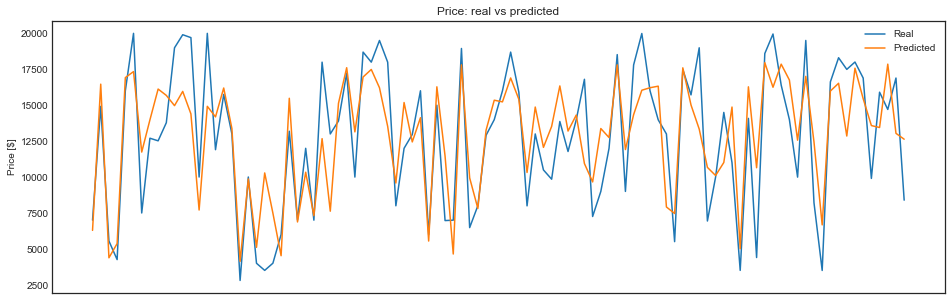

In [98]:
plt.rcParams['figure.figsize'] = 16,5
plt.figure()
plt.plot(A[-100:], label="Real")
plt.plot(B[-100:], label="Predicted")
plt.legend()
plt.title("Price: real vs predicted")
plt.ylabel("Price [$]")
plt.xticks(())
plt.show()

<p class="lead">We can notice clearly that the two line (real vs predicted) fit each other well, with some small differences which let us say that we did a good improvement compared with the first model.</p>

## Model Evaluation

<p class="lead">It appears that the Gradient Boosting model regressor win the battle with the lowest RMSE value and the highest R^2 score. In the following table we will do a benchmarking resuming all the models tested above.</p>

<table class="table table-bordered">
    <thead>
      <tr>
        <th>Model</th>
        <th>Variance Score</th>
        <th>RMSE</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td>KNN</td>
        <td>0.56</td>
        <td>37709.67</td>
      </tr>
      <tr>
        <td>Multiple Linear Regression</td>
        <td>0.62</td>
        <td>34865.07</td>
      </tr>
      <tr style="color: green">
        <td>Gradient Boosting</td>
        <td>0.80</td>
        <td>25176.16</td>
      </tr>
      <tr>
        <td><b>Decision Tree</b></td>
        <td><b>0.63</b></td>
        <td><b>34551.17</b></td>
      </tr>
    </tbody>
</table>

<p class="lead">Since the Gradient Boosting regressor is the winner, we will now inspect its coeficients and interceptors.</p>

## Let's predict an observation never seen before

<p class="lead">To do that we first build a function that takes a simple user input and transform it to a one hot encoding.</p>

In [115]:
# user_input = [2010, 124999.5, 6, 'Diesel', 'BMW']
user_input = {'Year':2006, 'Mileage':82499.5, 'Make':'BMW'}
def input_to_one_hot(data):
    # initialize the target vector with zero values
    enc_input = np.zeros(45)
    # set the numerical input as they are
    enc_input[0] = data['Year']
    enc_input[1] = data['Mileage']
#     enc_input[2] = data['Make']
    ##################### Mark #########################
    # get the array of marks categories
    Makes = df.Make.unique()
    # redefine the the user inout to match the column name
    redefinded_user_input = 'Make_'+data['Make']
    # search for the index in columns name list 
    make_column_index = X.columns.tolist().index(redefinded_user_input)
    #print(mark_column_index)
    # fullfill the found index with 1
    enc_input[make_column_index] = 1
    ##################### Fuel Type ####################
    # get the array of fuel type
#     fuel_types = df.fuel_type.unique()
    # redefine the the user inout to match the column name
#     redefinded_user_input = 'fuel_type_'+data['fuel_type']
    # search for the index in columns name list 
#     fuelType_column_index = X.columns.tolist().index(redefinded_user_input)
    # fullfill the found index with 1
#     enc_input[fuelType_column_index] = 1
    return enc_input

In [116]:
print(input_to_one_hot(user_input))

[2.00600e+03 8.24995e+04 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00]


In [117]:
a = input_to_one_hot(user_input)

In [118]:
price_pred = gbr.predict([a])

In [119]:
price_pred[0]

8746.870445584796

### Save the best Model

In [120]:
from sklearn.externals import joblib

joblib.dump(gbr, 'model.pkl')

['model.pkl']

In [121]:
gbr = joblib.load('model.pkl')

In [122]:
print("the best price for this BMW is",gbr.predict([a])[0])

the best price for this BMW is 8746.870445584796


### Build a REST API

In [123]:
import requests, json

In [124]:
url = "http://127.0.0.1:5000/api"
data = json.dumps({'Year':2014, 'Mileage':82499.5,  'Make':'BMW'})

r = requests.post(url, data)

print(r.json())

ConnectionError: HTTPConnectionPool(host='127.0.0.1', port=5000): Max retries exceeded with url: /api (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x00000280BB720320>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it',))

In [52]:
r.json()['results'][0]

290275.6155041407